#Projet Data Science II

Jessica FORNETTI (AMSD)

##Dataset Classic3

On importe le dataset classic3 :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/classic3.csv')
df = df.drop(df.columns[[0]], axis=1)

df

,text,label
0,Milestones in Cataloging In the case of the pr...,cisi
1,childhood psychosis. a description is given of...,med
2,neonatal hepatitis or familial neonatal obstru...,med
3,Handbook of Comparative Librarianship The firs...,cisi
4,Design and Evaluation of Information Systems T...,cisi
...,...,...
3886,modification of autistic behavior with lsd-25....,med
3887,Patterns of Evaluation in Science: Institution...,cisi
3888,The government of the American Public Library ...,cisi
3889,base pressure at subsonic speeds in the presen...,cran


On fait le preprocessing : enlever la ponctuation, mettre tout en miniscule, tokenizer, enlever les stopwords et lemmatizer

In [3]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
df['preprocessing'] = df['text'].apply(lambda review: data_preprocessing(review))
df.head()

,text,label,preprocessing
0,Milestones in Cataloging In the case of the pr...,cisi,milestone cataloging case present study dr leh...
1,childhood psychosis. a description is given of...,med,childhood psychosis description given diagnost...
2,neonatal hepatitis or familial neonatal obstru...,med,neonatal hepatitis familial neonatal obstructi...
3,Handbook of Comparative Librarianship The firs...,cisi,handbook comparative librarianship first part ...
4,Design and Evaluation of Information Systems T...,cisi,design evaluation information system co joinin...


On créé la liste sentences contenant une liste de chaque texte sous forme de strings separés et la liste sentences2 sous forme de tuple contenant le label associé

In [5]:
sentences = [line for line in df['preprocessing'].apply(lambda review: str.split(review))]
sentences2 = [(sentences[i], df['label'][i]) for i in range(len(sentences))]

#sentences2

On effectue une représentation textuelle Word2vec :

In [15]:
from gensim.models import Word2Vec

model = Word2Vec(sentences)
print(model)

Word2Vec<vocab=6400, vector_size=100, alpha=0.025>


On obtient un vocabulaire de 6400 mots qu'on store dans la liste words

In [7]:
words = list(model.wv.key_to_index.keys())
words

['flow',
 'library',
 'number',
 'information',
 'pressure',
 'result',
 'method',
 'effect',
 'system',
 'boundary',
 'layer',
 'theory',
 'body',
 'case',
 'two',
 'study',
 'problem',
 'one',
 '1',
 'data',
 'solution',
 'wing',
 'mach',
 'analysis',
 '2',
 'may',
 'use',
 'equation',
 'given',
 'distribution',
 'shock',
 'found',
 'made',
 'cell',
 'also',
 'surface',
 'heat',
 'patient',
 'used',
 'time',
 'temperature',
 'obtained',
 'ratio',
 'value',
 'test',
 'term',
 'present',
 'condition',
 'paper',
 'research',
 'speed',
 'field',
 'type',
 'transfer',
 'supersonic',
 'presented',
 'plate',
 '3',
 'form',
 '0',
 'high',
 'velocity',
 'large',
 'change',
 'experimental',
 'model',
 'wave',
 'science',
 'retrieval',
 'first',
 'normal',
 'function',
 'free',
 'book',
 'discussed',
 'investigation',
 'development',
 'rate',
 'general',
 'laminar',
 'subject',
 'cylinder',
 '5',
 'group',
 'jet',
 'new',
 'service',
 'point',
 'small',
 'angle',
 'year',
 'range',
 'three',
 '

On utilise sentences2 pour avoir la liste des labels associés aux mots du vocabulaire, pour pouvoir comparer nos clusterings par la suite (en calculant les métrique NMI et ARI)

In [8]:
vocab_labels = []

for word in words:
  for j in range(len(sentences2)):
    if(word in sentences2[j][0]):
      vocab_labels.append(sentences2[j][1])
      break

vocab_labels


['cran',
 'cisi',
 'cisi',
 'cisi',
 'cran',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cran',
 'cran',
 'med',
 'cisi',
 'med',
 'cisi',
 'cisi',
 'med',
 'med',
 'cisi',
 'cran',
 'cran',
 'cran',
 'cisi',
 'med',
 'cisi',
 'cisi',
 'cran',
 'med',
 'cran',
 'cran',
 'cran',
 'cran',
 'med',
 'cisi',
 'cran',
 'cran',
 'med',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cran',
 'cran',
 'med',
 'cisi',
 'cran',
 'med',
 'cisi',
 'cran',
 'cisi',
 'cisi',
 'cran',
 'cran',
 'med',
 'med',
 'med',
 'cran',
 'cran',
 'cran',
 'cran',
 'cisi',
 'cisi',
 'cran',
 'cran',
 'cran',
 'cisi',
 'cisi',
 'cisi',
 'med',
 'cran',
 'cran',
 'cisi',
 'med',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'med',
 'med',
 'cran',
 'cisi',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cisi',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cisi',
 'cran',
 'cran',
 'cran',
 'cran',
 'cisi',
 'cran',
 'med',
 'med',
 'cisi',
 'cisi',
 'cran',
 'cisi',
 'cisi',
 'cisi',
 '

On ne peut pas utiliser la version de la representation GloVe qui est donnée car le fichier est trop lord pour pouvoir être uploadé à Google Collab. En effet on voit un cercle rouge quand on essaie d'uploader le fichier glove.840B.300d.txt et on a l'erreur suivante qui prouve bien qu' il n'a pas pu upload le fichier car le fichier est introuvé ( No such file or directory: '/content/glove.840B.300d.txt')

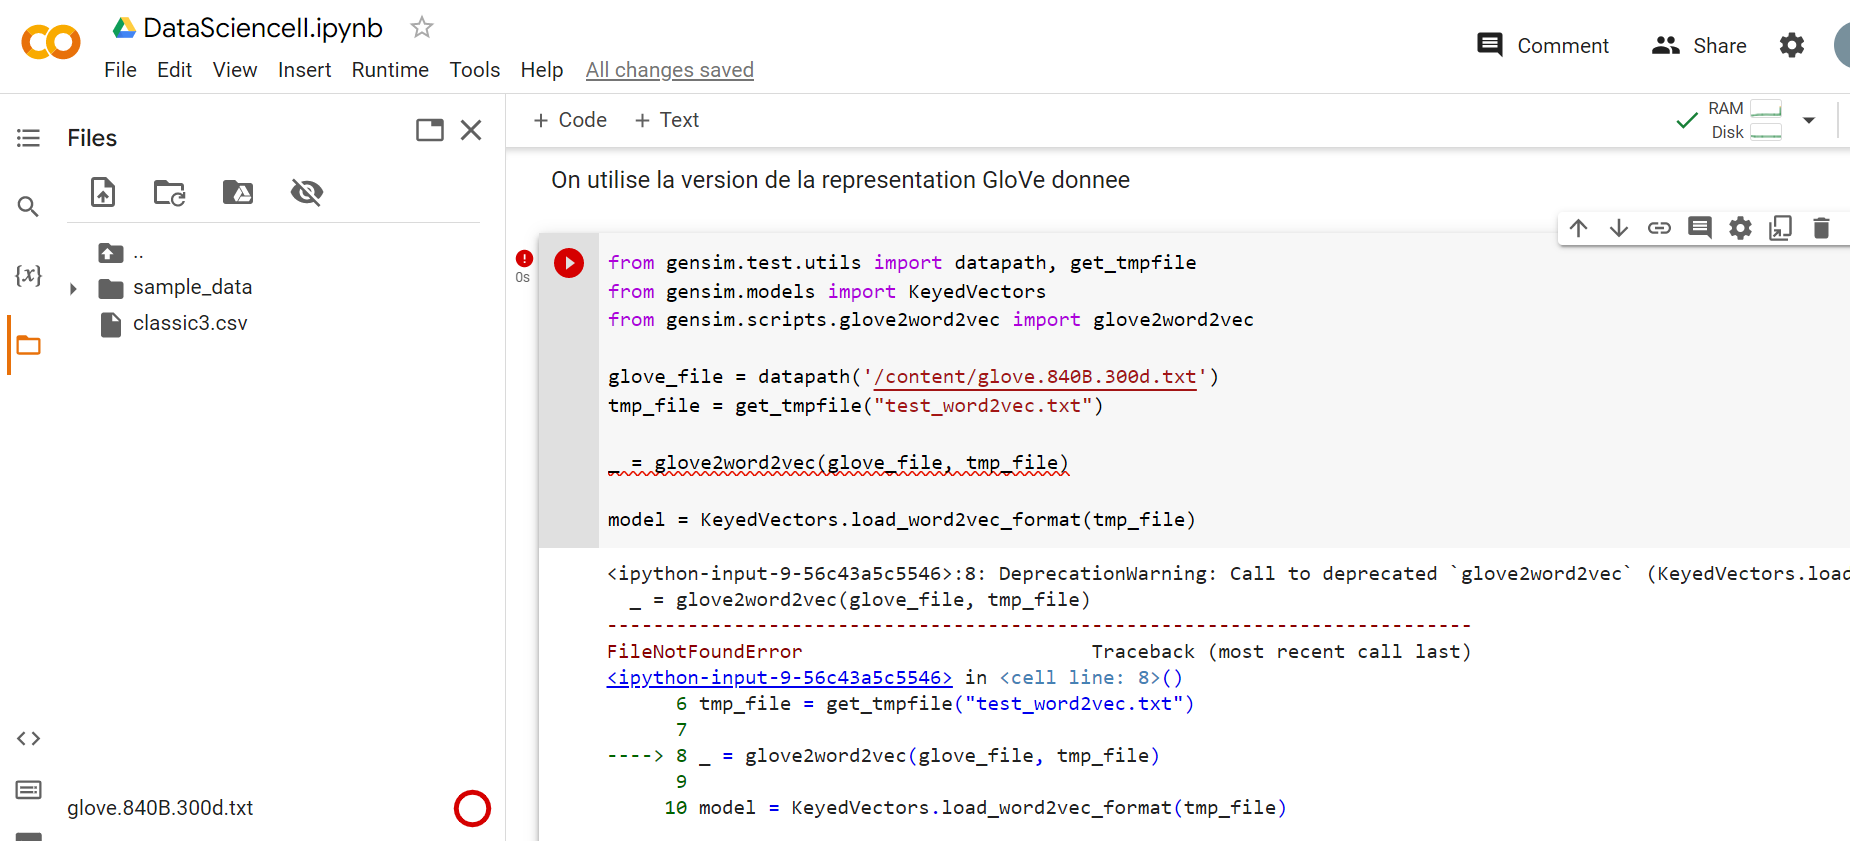

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/glove.840B.300d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

<ipython-input-10-56c43a5c5546>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


FileNotFoundError: ignored

###Partie 1 : Approche Tandem

On voit qu'il y a en realité 3 vrai classes d'après la colone label des données

In [9]:
df['label'].unique()

array(['cisi', 'med', 'cran'], dtype=object)

On convertit les labels en entiers pour pouvoir faire les comparaisons par la suite

In [10]:
vocab_labels2 = [0 if elem == 'cisi' else elem for elem in vocab_labels]
vocab_labels2 = [1 if elem == 'cran' else elem for elem in vocab_labels2]
vocab_labels2 = [2 if elem == 'med' else elem for elem in vocab_labels2]

#vocab_labels2

On fait le scatter plot dans la dimension d'origine des vrai labels

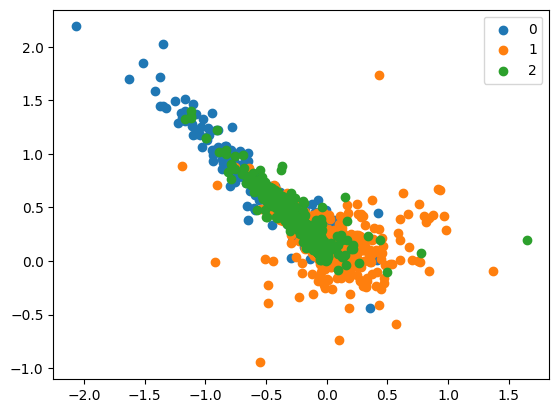

In [11]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

####Clustering Kmeans++

#####Espace d'origine

On fait le clustering Kmeans++ dans l'espace d'origine. On garde les paramètres par défault : n_clusters=8 et init='k-means++' car il utilise par défault l'algorithme kmeans++

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


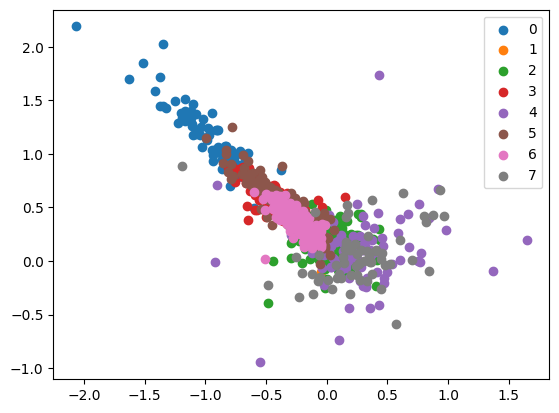

In [12]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans()
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Il nous trouve par défault beaucoup trop de classes, donc on met n_clusters=3 pour qu'il ait le bon nombre de classes et qu'on puisse évaluer et comparer les clusterings avec les métriques d'accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


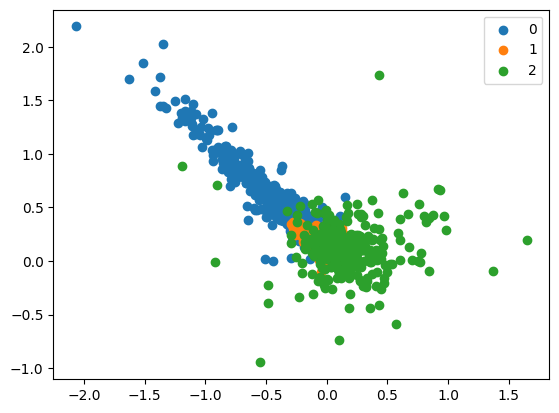

In [13]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde ensuite les métriques d'accuracy NMI et ARI. Le score NMI est un score variant de 0 à 1 qui permet de mesurer l'exactitude de l'assignation des differents clusters. Le score ARI varie de -0.5 à 1. Un score de 1 veut dire un clustering presque parfait (les vrai labels et les labels predits coincident), un score de 0 signifie un clustering randomisé et un score de -0.5 correspond à un clustering pire que randomisé

In [14]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [15]:
nmi

0.052237740561876966

In [16]:
ari

0.015447830826034938

On obtient un score NMI et ARI très mauvais, en effet on voit bien que les clusters asignés par kmeans++ ne corespondent pas à ceux dans la realité

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=3 il trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


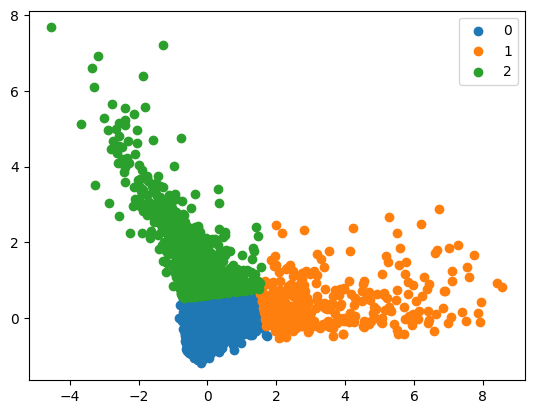

In [26]:
from sklearn.decomposition import PCA

X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

On obtient les scores suivants:

In [27]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [28]:
nmi

0.05606904606679037

In [29]:
ari

0.020234647214650778

En regardant la vrai répartition des classes après une ACP, on voit bien que ce clustering nous donne de très mauvais resultats ce qui est confirmé par les métriques NMI et ARI

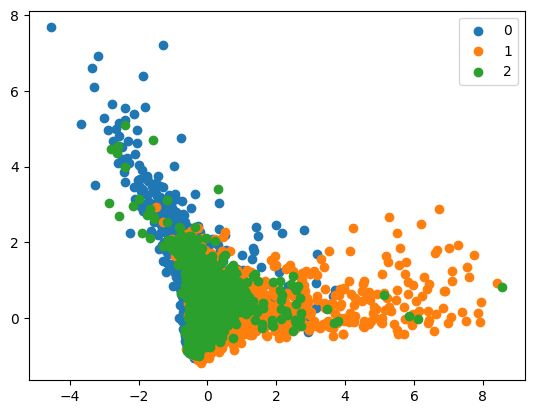

In [21]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####T-SNE

On fait une réduction de dimension t-SNE avant le clustering

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


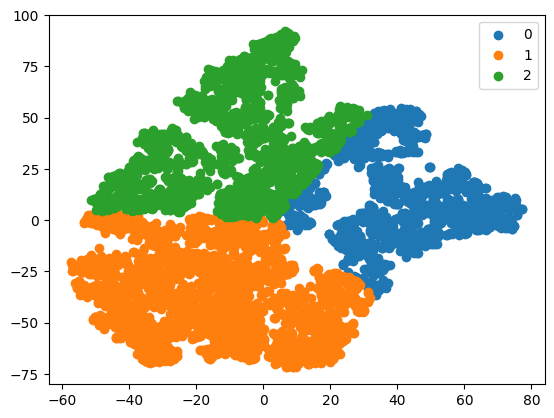

In [30]:
from sklearn.manifold import TSNE

X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les scores NMI et ARI :

In [31]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [32]:
nmi

0.07828191849926933

In [33]:
ari

0.06800335112737048

On obtient de mauvais resultats, ce qui est confirmé en regardant la vrai répartition des classes après une réduction de dimension t-SNE:

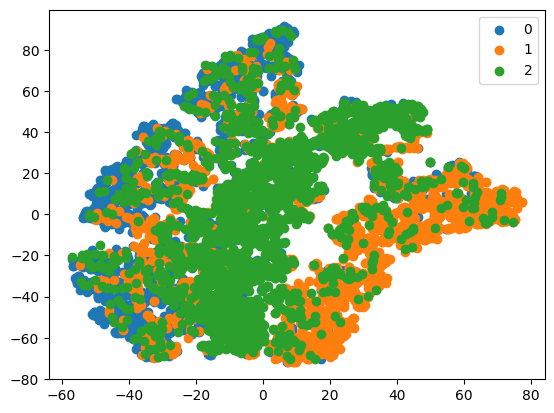

In [34]:
X = model.wv.vectors

label = vocab_labels2
result = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####UMAP

On fait une réduction de dimension UMAP avant le clustering

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

In [35]:
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=6e885dc2137daa262e1bfe6989b22f2b556e0211dd5e490b22fa1b70a82b67ad
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=1032dae5e1e46a1536598976fc2dee1f6d5a5d501182b9d08c472fc7065ae1de
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


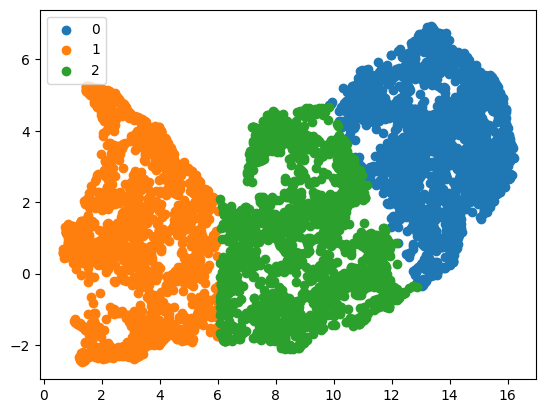

In [36]:
import umap

X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()


On regarde les metriques NMI et ARI :


In [37]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [38]:
nmi

0.0054768415612968645

In [39]:
ari

0.00554446069248454

On obtient d'extremement mauvais score NMI et ARI, cela est bien confirmé en regardant la vrai répartition des classes après une réduction de dimension UMAP car on trouve des classes totalement differentes:

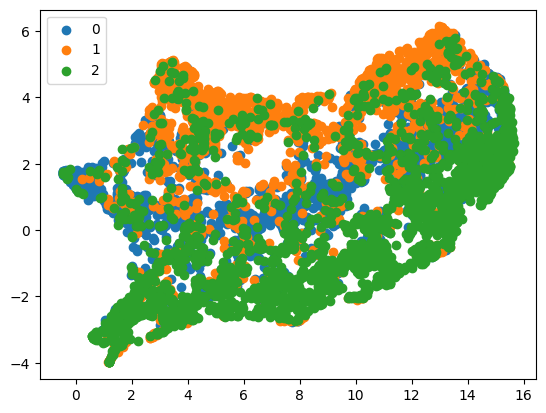

In [40]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

####Clustering Kmedoids

In [20]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00


#####Espace d'origine

On fait le clustering Kmedoids dans l'espace d'origine.
Comme l'algorithme ne trouve pas le bon nombre de classes, on met n_clusters=3 pour qu'on puisse évaluer et comparer avec les autres clusterings


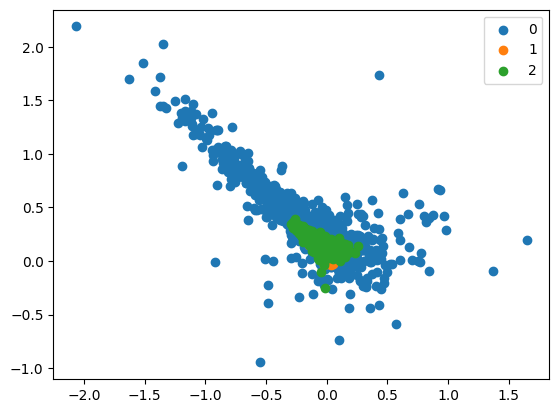

In [42]:
from sklearn_extra.cluster import KMedoids

X = model.wv.vectors

kmedoids = KMedoids(n_clusters=3)
label = kmedoids.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [43]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [44]:
nmi

0.0031544564359668272

In [45]:
ari

0.0030846951196766897

On obtient des scores extremement mauvais, en effet on voit bien que les clusters asignés par kmediods ne coreespondent pas à ceux dans la realité


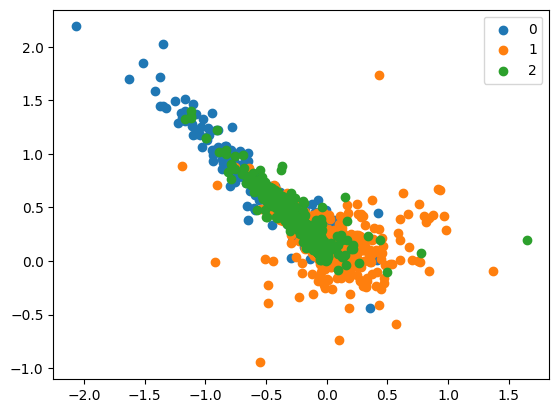

In [46]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=3 il trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

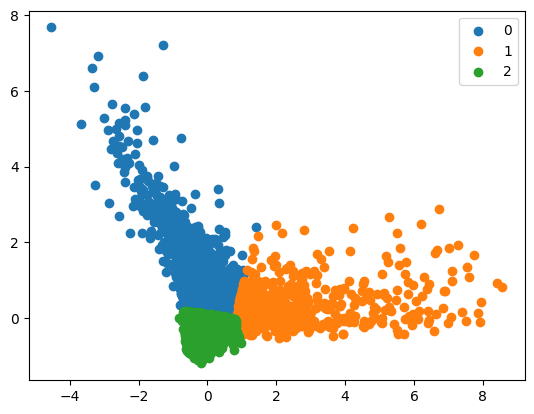

In [47]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

kmedoids = KMedoids(n_clusters=3)
label = kmedoids.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

On obtient les scores suivants:

In [48]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [49]:
nmi

0.060414326728584176

In [50]:
ari

0.03215858324028198

En regardant la vrai répartition des classes après une ACP, on voit bien que ce clustering nous donne de très mauvais resultats ce qui est confirmé par les métriques NMI et ARI


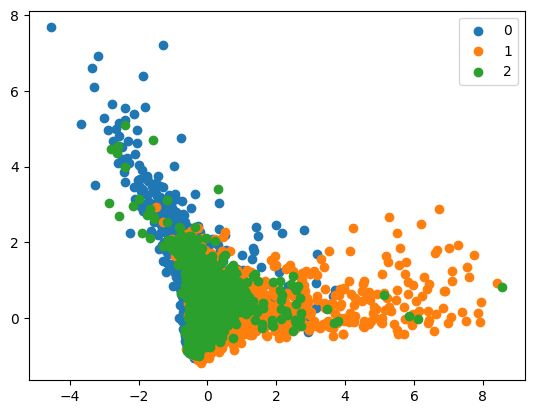

In [51]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()


#####T-SNE

On fait une réduction de dimension t-SNE avant le clustering

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

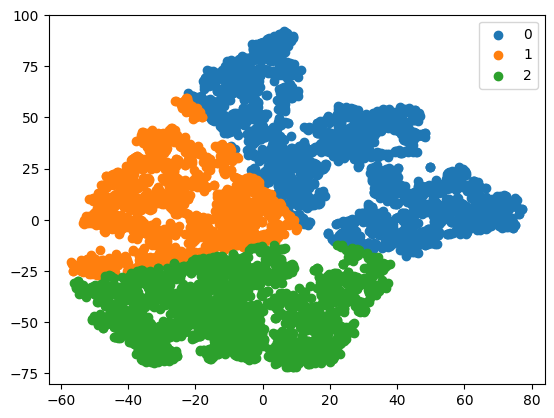

In [52]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

kmedoids = KMedoids(n_clusters=3)
label = kmedoids.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les scores NMI et ARI :

In [53]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [54]:
nmi

0.026706017103099954

In [55]:
ari

0.018487878091249542

On obtient de très mauvais resultats, ce qui est confirmé en regardant la vrai répartition des classes après une réduction de dimension t-SNE:


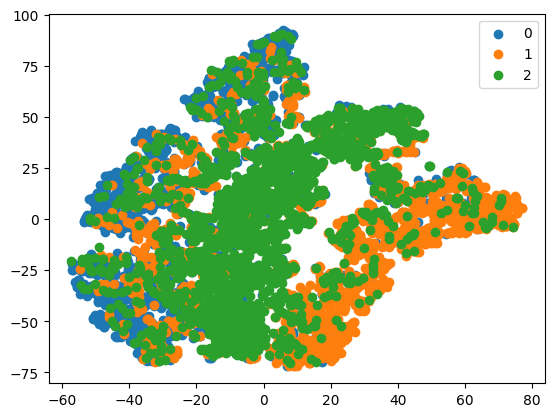

In [56]:
X = model.wv.vectors

label = vocab_labels2
result = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####UMAP

On fait une réduction de dimension UMAP avant le clustering

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

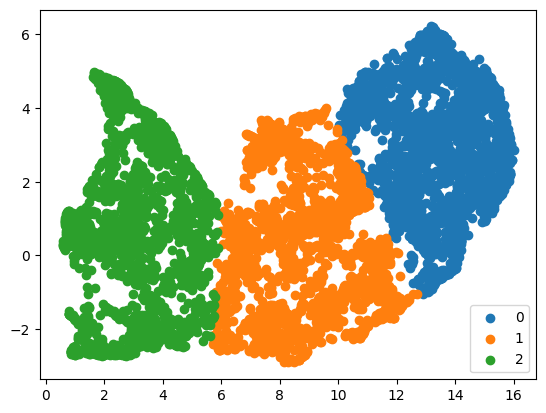

In [57]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

kmedoids = KMedoids(n_clusters=3)
label = kmedoids.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les metriques NMI et ARI :

In [58]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [59]:
nmi

0.005943443864506579

In [60]:
ari

0.006057036992894361

On obtient d'extremement mauvais scores NMI et ARI, cela est bien confirmé en regardant la vrai répartition des classes après une réduction de dimension UMAP car on trouve des classes totalement differentes:


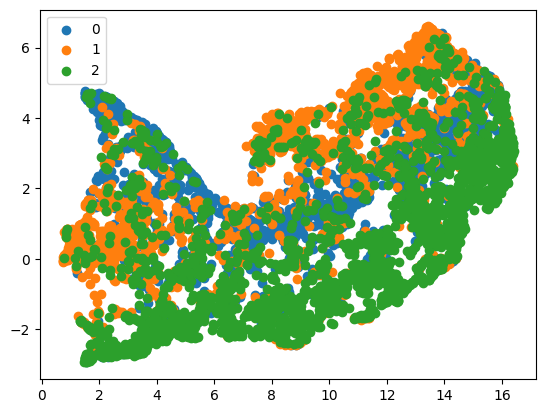

In [61]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()



####Spherical Kmeans

In [24]:
! pip install coclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for coclust: filename=coclust-0.2.1-py3-none-any.whl size=29853 sha256=e3e68e114acb47bb9b384ee6198565010fb85a6d3bfa1fd7e8bb0792f01bf64c
  Stored in directory: /root/.cache/pip/wheels/bf/93/3c/e90605656484712ead3e521b0d4d2c9d8cde8125a3ef6dd1df
Successfully built coclust


#####Espace d'origine

On fait le clustering SphericalKmeans dans l'espace d'origine. Comme l'algorithme ne trouve pas le bon nombre de classes, on met n_clusters=3 pour qu'on puisse évaluer et comparer avec les autres clusterings


 == New init == 
iteration: 0
5620.593314006159
iteration: 1
5840.06578620277
iteration: 2
5899.888532695009
iteration: 3
5988.696405001379
iteration: 4
6008.440182826942
iteration: 5
6010.7926954727845
iteration: 6
6011.1583152230805
iteration: 7
6011.228028794219
iteration: 8
6011.239656539992
iteration: 9
6011.243534223093
iteration: 10
6011.243972609053
iteration: 11
6011.2440877827485
iteration: 12


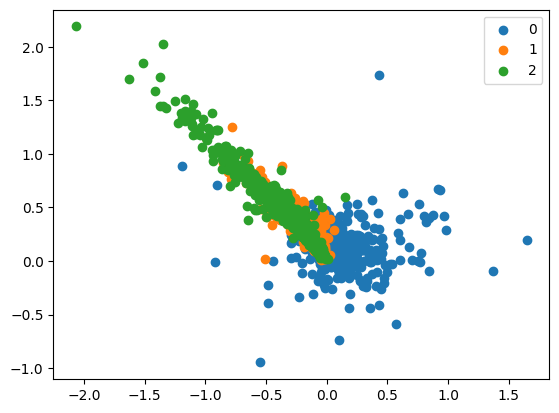

In [63]:
from coclust.clustering import SphericalKmeans

X = model.wv.vectors

skmeans = SphericalKmeans(n_clusters=3)
skmeans.fit(X)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()


In [64]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [65]:
nmi

0.32022159321853094

In [66]:
ari

0.3744935912526253

On obtient des scores plutot mauvais, en effet on voit bien que les clusters asignés par SphericalKmeans ne corespondent pas vraiment à ceux dans la realité

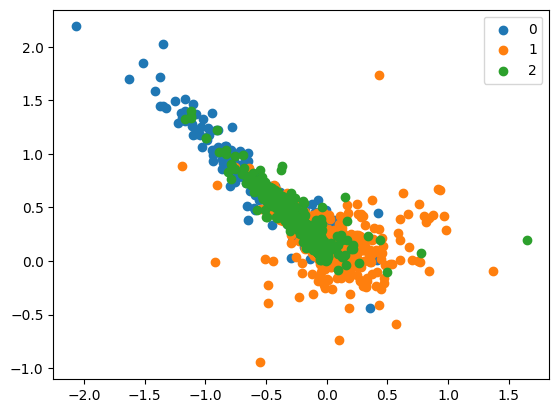

In [67]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=3 il trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

 == New init == 
iteration: 0
2179.3515566970714
iteration: 1
4926.071060803797
iteration: 2
5456.457765026636
iteration: 3
5721.500682335538
iteration: 4
5859.66405055147
iteration: 5
5892.0335410702955
iteration: 6
5897.650146968974
iteration: 7
5898.572087414359
iteration: 8
5898.657873094043
iteration: 9
5898.665961471468
iteration: 10
5898.670156192669
iteration: 11
5898.677102227794
iteration: 12
5898.677664399073
iteration: 13
5898.678053636779
iteration: 14


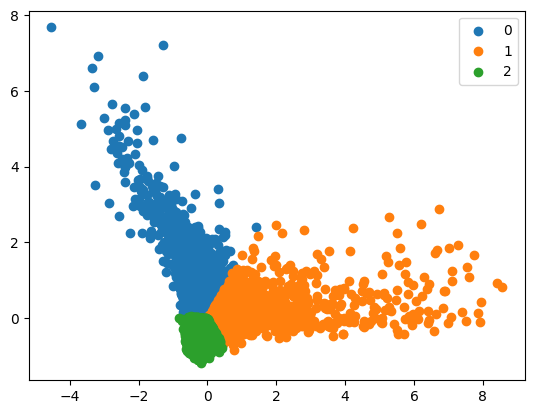

In [68]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

skmeans = SphericalKmeans(n_clusters=3)
skmeans.fit(result)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

On obtient les metriques suivantes:

In [69]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [70]:
nmi

0.07859431316561402

In [71]:
ari

0.05689094789923008

En regardant la vrai répartition des classes après une ACP, on voit que ce clustering nous donne un très mauvais resultat ce qui est confirmé par les métriques NMI et ARI


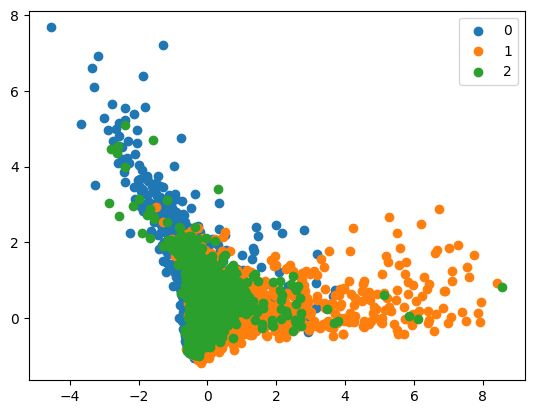

In [72]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####T-SNE

On fait une réduction de dimension t-SNE avant le SphericalKmeans

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

 == New init == 
iteration: 0
2221.3998188659843
iteration: 1
5180.738821807409
iteration: 2
5379.879486071407
iteration: 3
5403.9162274947785
iteration: 4
5416.96259630301
iteration: 5
5428.67275023056
iteration: 6
5440.980610800802
iteration: 7
5453.263347052274
iteration: 8
5460.666881688079
iteration: 9
5465.941040892752
iteration: 10
5468.9486310444145
iteration: 11
5469.73946744245
iteration: 12
5470.166831289839
iteration: 13
5470.546795706843
iteration: 14
5470.956414721184
iteration: 15
5471.339225953418
iteration: 16
5471.850046071403
iteration: 17
5472.147803656809
iteration: 18
5472.398820089485
iteration: 19
5472.714281044498


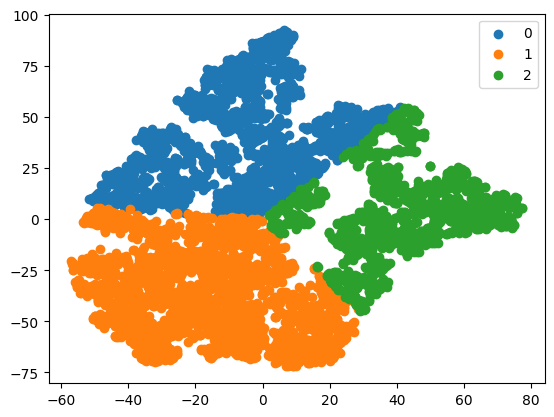

In [73]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

skmeans = SphericalKmeans(n_clusters=3)
skmeans.fit(X_transforme)
label = skmeans.labels_


u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les scores NMI et ARI :

In [74]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [75]:
nmi

0.08931690088534602

In [76]:
ari

0.07933234737448915

On obtient de très mauvais resultats, ce qui est confirmé en regardant la vrai répartition des classes après une réduction de dimension t-SNE:


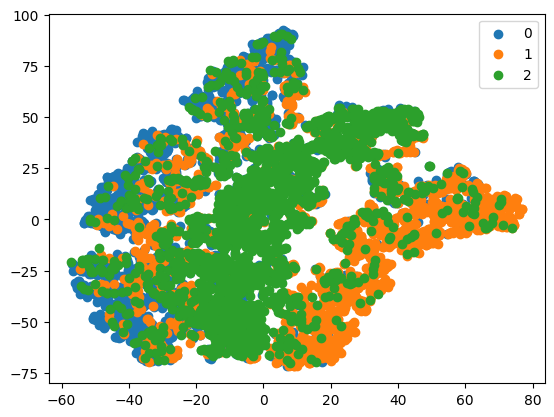

In [77]:
X = model.wv.vectors

label = vocab_labels2
result = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

#####UMAP

On fait une réduction de dimension UMAP avant le clustering

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

 == New init == 
iteration: 0
6012.653629557352
iteration: 1
6237.172917537836
iteration: 2
6275.737745085201
iteration: 3
6283.47448675183
iteration: 4
6286.026108085209
iteration: 5
6287.086584605684
iteration: 6
6287.946525871244
iteration: 7
6289.810740106306
iteration: 8
6293.675723413018
iteration: 9
6296.120936743515
iteration: 10
6296.520528682162
iteration: 11
6296.603837480203
iteration: 12
6296.645852783086
iteration: 13
6296.674491339664
iteration: 14
6296.684194808284
iteration: 15
6296.689889901067
iteration: 16
6296.691971410173
iteration: 17
6296.693962244635
iteration: 18
6296.695423340005
iteration: 19
6296.696744817383


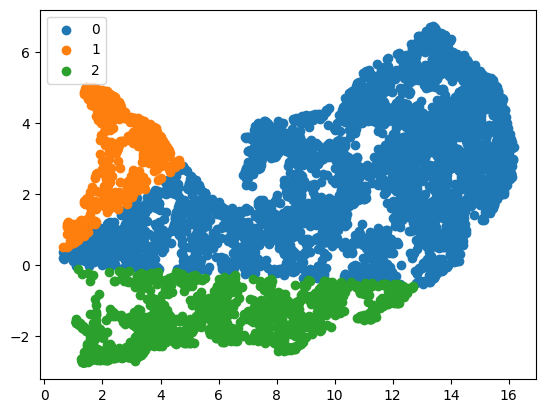

In [78]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

skmeans = SphericalKmeans(n_clusters=3)
skmeans.fit(X_transforme)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

On regarde les metriques NMI et ARI :

In [79]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [80]:
nmi

0.09638575516926458

In [81]:
ari

0.0416427759425622

On obtient de très mauvais scores NMI et ARI, cela est bien confirmé en regardant la vrai répartition des classes après une réduction de dimension UMAP car on trouve des classes totalement differentes:


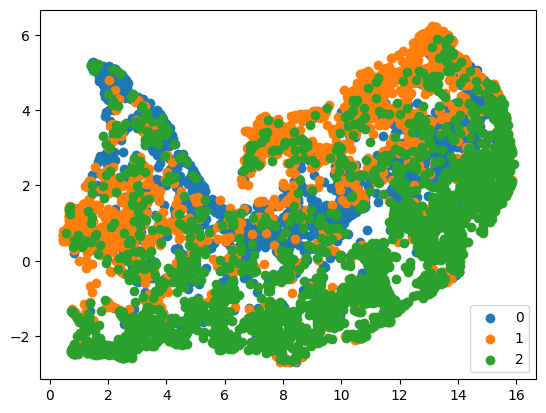

In [82]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

####Clustering Hierarchique

#####Espace d'origine

On fait le clustering hierarchique dans l'espace d'origine. Comme l'algorithme ne trouve pas le bon nombre de classes, on met n_clusters=3 pour qu'on puisse évaluer et comparer avec les autres clusterings


Pour choisir le meilleur critère d'agrégation (single, complete, ward ou average), on regarde la forme et la distribution des vraies classes

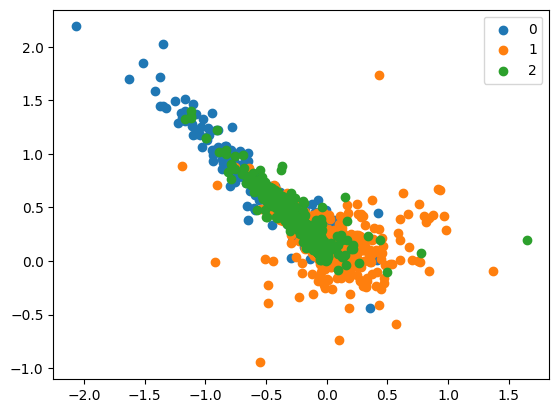

In [83]:
X = model.wv.vectors

label = vocab_labels2

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Si on utilise single comme critère d'aggrégation, comme les points on une forme allongé, il aura du mal à retrouver les clusters (à cause de l'effet de chaine)

Si on utilise complete il poura bien integrer les points outliers mais ne produira pas forcément de bons clusters

Si on utilise le critère de Ward on aura des clusters d'allure spherique ce qui peut marcher dans notre cas

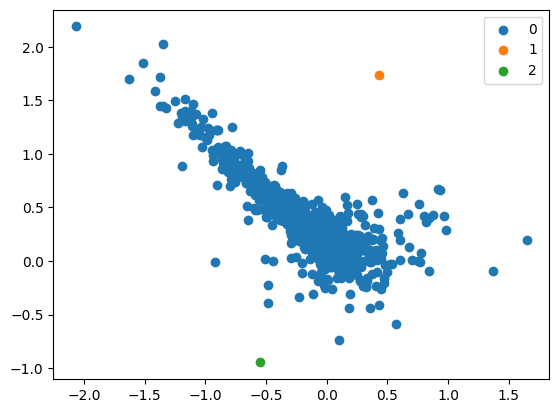

In [84]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='single')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

En effet on voit qu'avec single il regroupe la majorité des points en un clusters à cause de la forme allongé des points

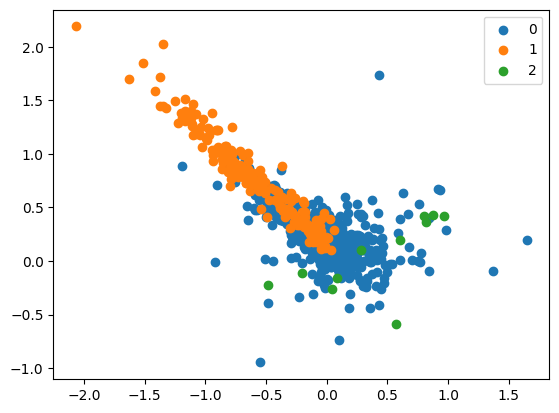

In [85]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='complete')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Avec complete il ne trouve pas non plus les bon clusters : il regroupe les points en deux grands clusters

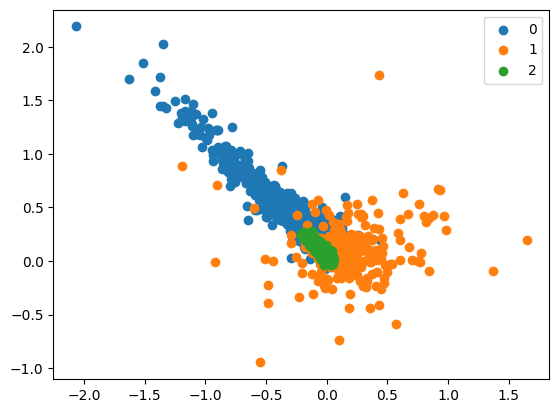

In [86]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='ward')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [87]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [88]:
nmi

0.034853671059689575

In [89]:
ari

0.016678554364861813

Le critère de ward nous donne le meilleur clustering, même si les metriques NMI et ARI restent très mauvaises       

#####ACP

On fait une ACP avant le clustering

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

On regarde la forme des vrais clusters (après l'ACP) pour choisir le critère d'aggregation

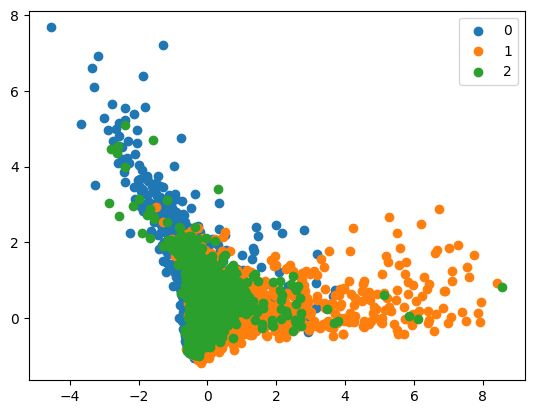

In [90]:
X = model.wv.vectors

label = vocab_labels2
pca = PCA(n_components=2)
result = pca.fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

Comme précédement, le critere single ne produira pas un bon clustering car les points sont regroupés de facon allongé

Le critere de ward aura aussi probablement du mal car les clusters se chevauchent et n'ont pas trop une forme spherique

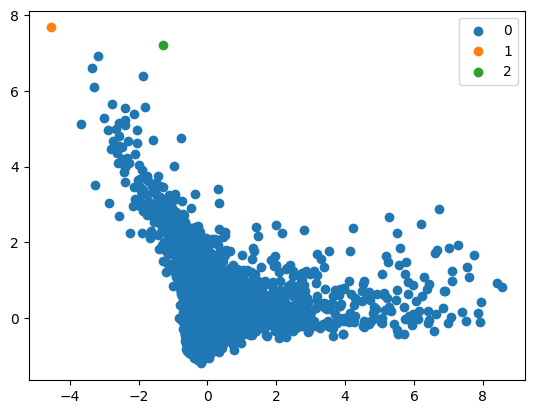

In [91]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='single')
label = clust_hierarchique.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

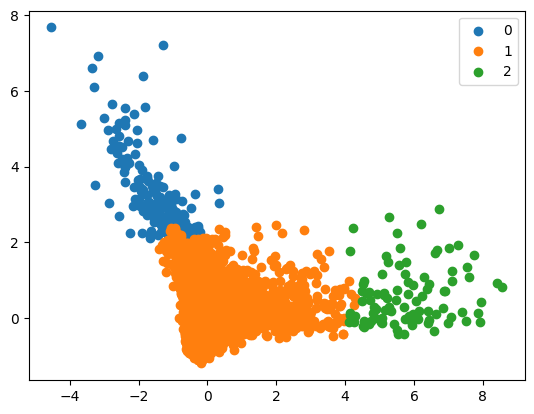

In [97]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='complete')
label = clust_hierarchique.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

In [98]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [99]:
nmi

0.04264346595904955

In [100]:
ari

0.0055627960061872305

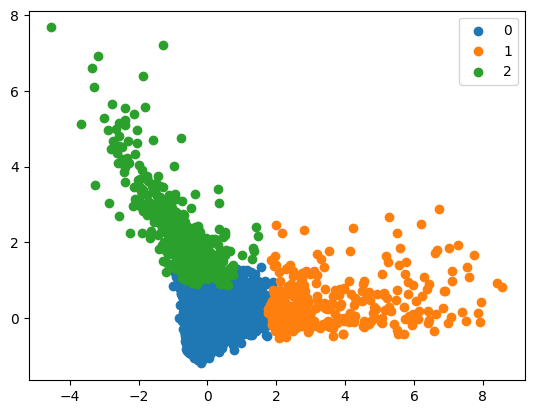

In [93]:
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='ward')
label = clust_hierarchique.fit_predict(result)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)
plt.legend()
plt.show()

In [94]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [95]:
nmi

0.056699397258226654

In [96]:
ari

0.01661421078240409

On obtient des métriques pas très élevées, donc le clustering est très mauvais avec le critère de ward même si cela reste meilleur que les autres critères.

#####T-SNE

On fait une reduction de dimension de type t-SNE avant le clustering hierarchique

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

On regarde par ailleurs la forme des vrais clusters pour choisir le critere d'aggregation


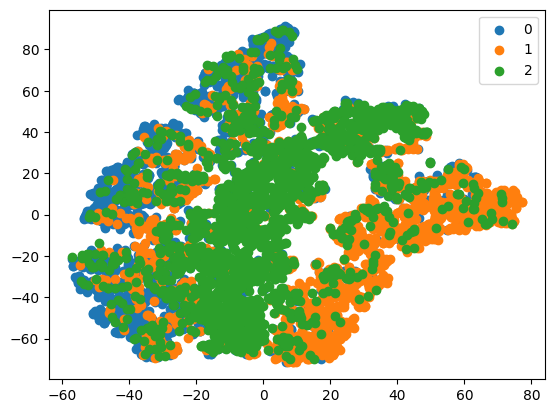

In [101]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = TSNE().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()


Comme précédement, le critere single et complete ne trouveront probablement pas les bon clusters, mais comme on a une forme spherique (et que les clusters se chevauchent beaucoup), même le critère de ward risque de ne pas trouver les bon clusters



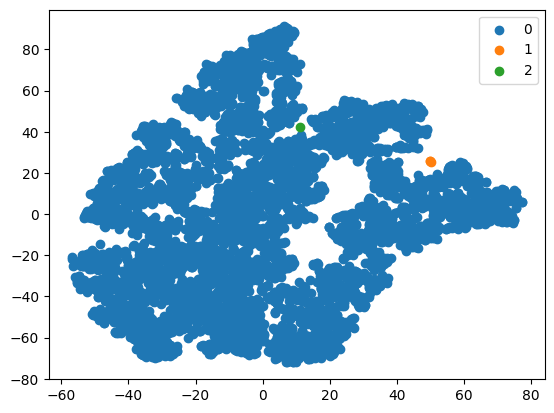

In [102]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='single')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

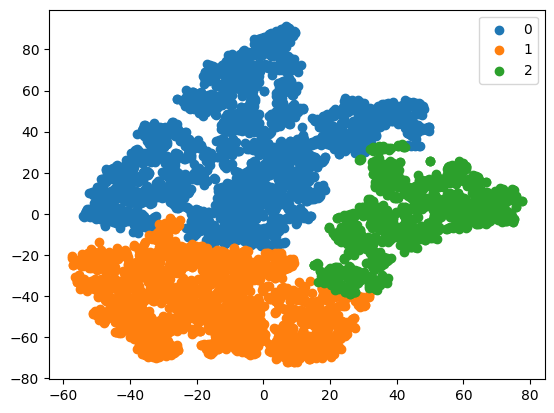

In [108]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='complete')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [109]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [110]:
nmi

0.10753087754951263

In [111]:
ari

0.09647740844484701

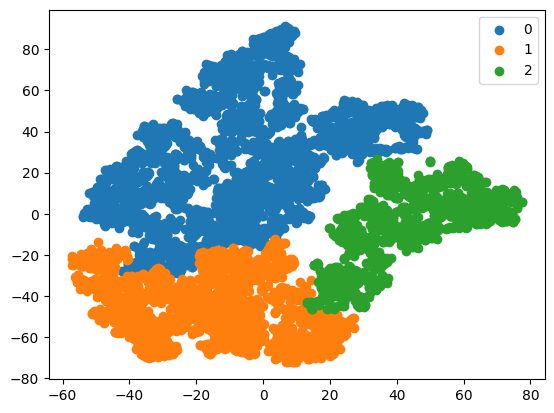

In [104]:
X = model.wv.vectors
X_transforme = TSNE().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='ward')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [105]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [106]:
nmi

0.11693224794995352

In [107]:
ari

0.10685278355692536

Chaque critère donne un mauvais clustering (même le critère de ward), ce qui est confirmé par les métriques

#####UMAP

On fait une reduction de dimension de type UMAP avant le clustering hierarchique

De même si on met n_clusters=3 l'algorithme trouve bien le bon nombre de classes, mais sinon il trouve trop de classes

On regarde par ailleurs la forme des vrais clusters pour choisir le meilleur critere d'aggregation

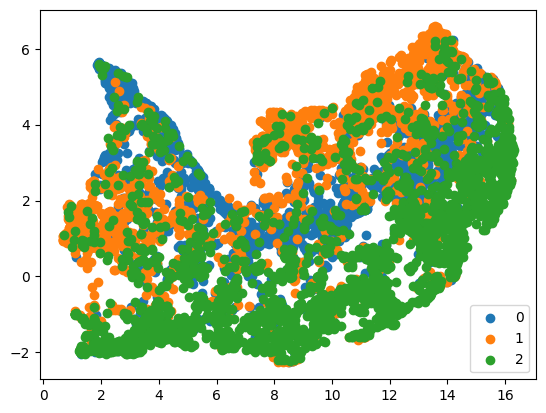

In [112]:
X = model.wv.vectors

label = vocab_labels2
X_transforme = umap.UMAP().fit_transform(X)

u_labels = np.unique(vocab_labels2)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

Comme les clusters se chevauchent énormément et n'ont pas une forme spherique, les differents critères risquent de pas trover les bons clusters


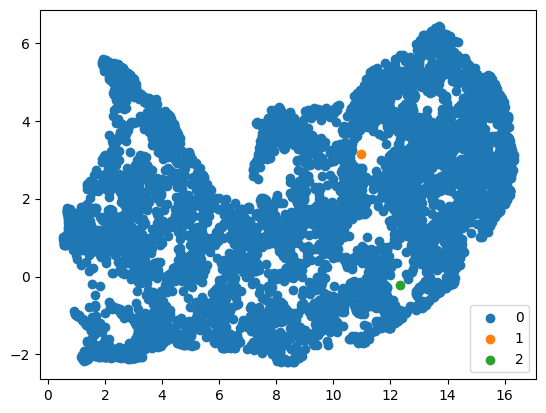

In [113]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='single')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

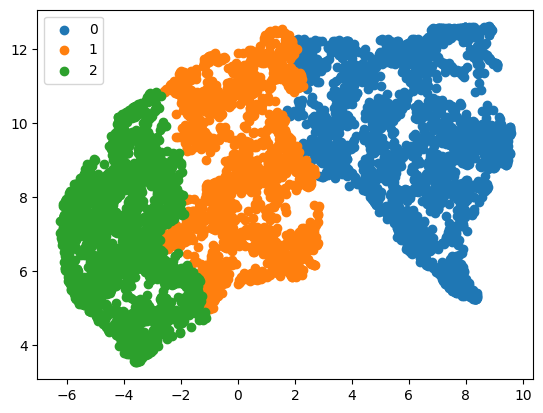

In [114]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='complete')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [115]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [116]:
nmi

0.0021095574646225962

In [117]:
ari

0.0018263328187096482

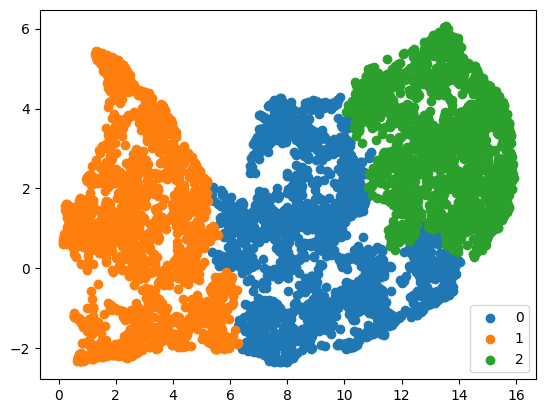

In [118]:
X = model.wv.vectors
X_transforme = umap.UMAP().fit_transform(X)

clust_hierarchique = AgglomerativeClustering(n_clusters=3, linkage='ward')
label = clust_hierarchique.fit_predict(X_transforme)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_transforme[label == i , 0] , X_transforme[label == i , 1] , label = i)
plt.legend()
plt.show()

In [119]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [120]:
nmi

0.008237860253422593

In [121]:
ari

0.009535220256953674

On voit que chaque critère donne un très mauvais clustering (même le critère de ward), ce qui est confirmé par les métriques

####Nombre de clusters

On utilise la methode du coude, le coefficient de silhouette et le coefficient calinski_harabasz pour estimer le nombre de clusters pour chaque méthode de clustering

#####Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

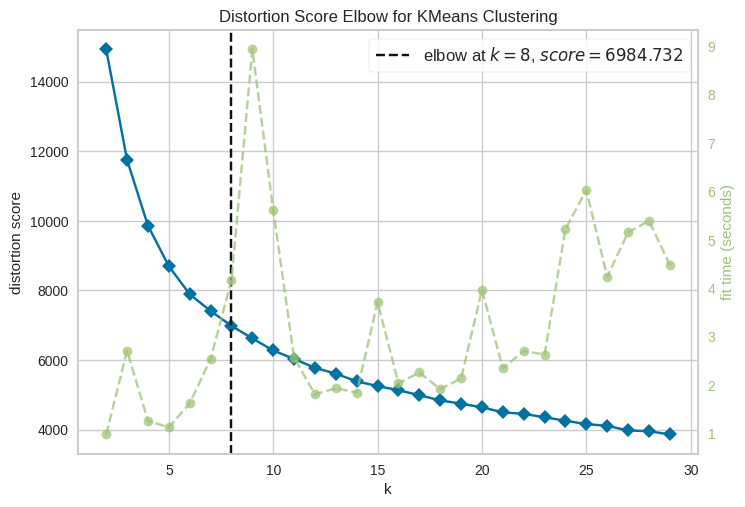

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X = model.wv.vectors
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

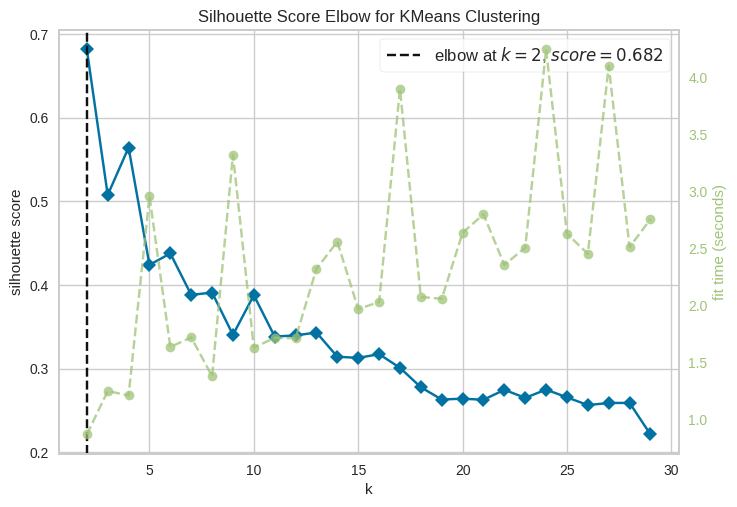

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

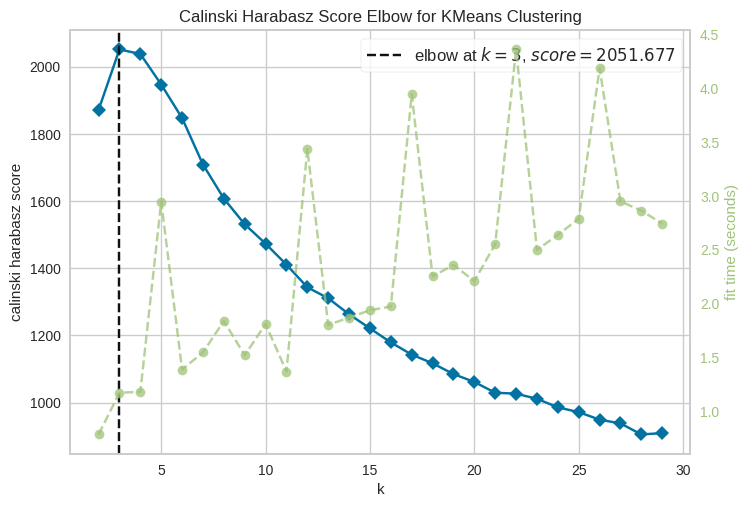

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show() 

Pour Kmeans, la méthode du coude donne 8 clusters, le coefficient Silhouette donne 2 clusters et le coefficient Calinski Harabasz donne 3 clusters

#####Kmedoids

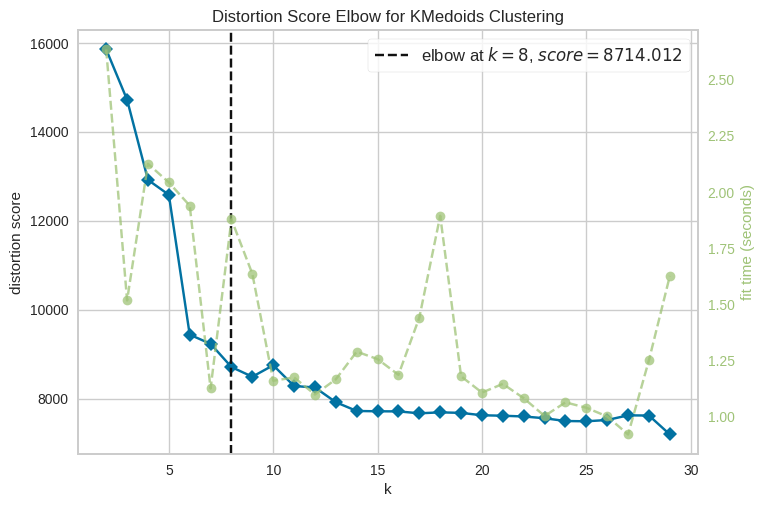

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMedoids()

visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show() 

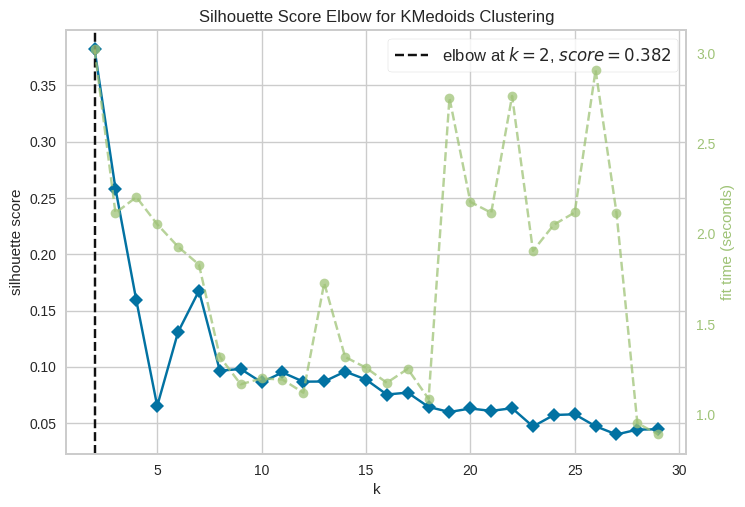

<Axes: title={'center': 'Silhouette Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer

X = model.wv.vectors
km = KMedoids()

visualizer = KElbowVisualizer(km, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show() 

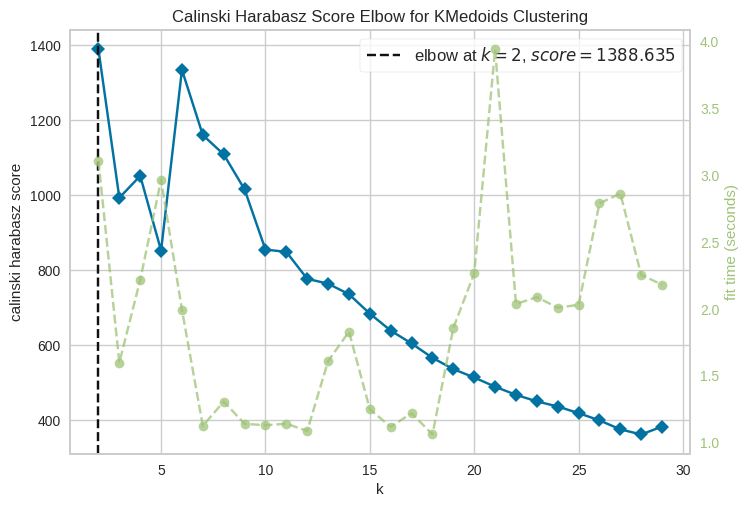

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer


X = model.wv.vectors
km = KMedoids()

visualizer = KElbowVisualizer(km, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show() 

Pour Kmedoids, la méthode du coude donne 8 clusters, le coefficient Silhouette donne 2 clusters et le coefficient Calinski Harabasz donne aussi 2 clusters

#####Spherical Kmeans

La méthode KElbowVisualizer du package yellowbrick.cluster ne permet pas d'obtenir les coefficients pour un modèle de type Spherical Kmeans

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from coclust.clustering import SphericalKmeans

X = model.wv.vectors
spherical = SphericalKmeans()

visualizer = KElbowVisualizer(spherical, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show() 

YellowbrickTypeError: ignored

#####Clustering hierarchique

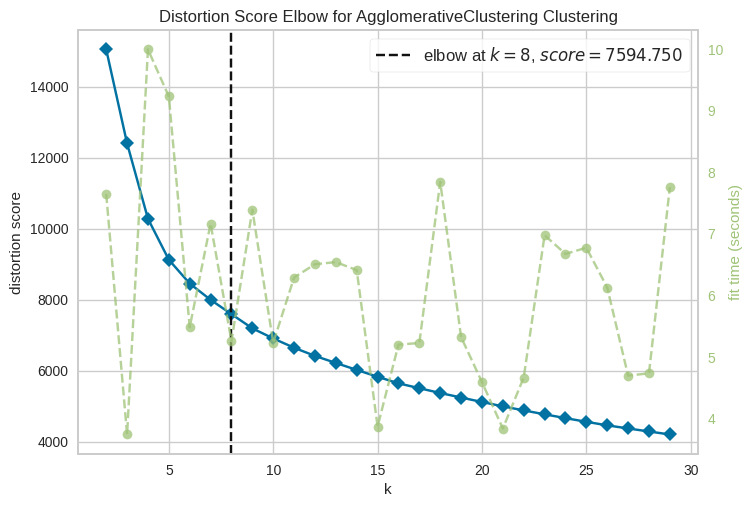

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors
clust_hier = AgglomerativeClustering()

visualizer = KElbowVisualizer(clust_hier, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

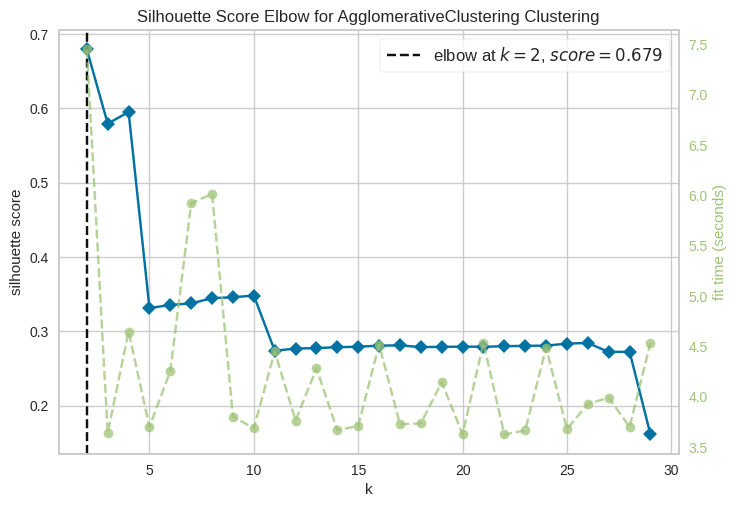

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors
clust_hier = AgglomerativeClustering()

visualizer = KElbowVisualizer(clust_hier, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

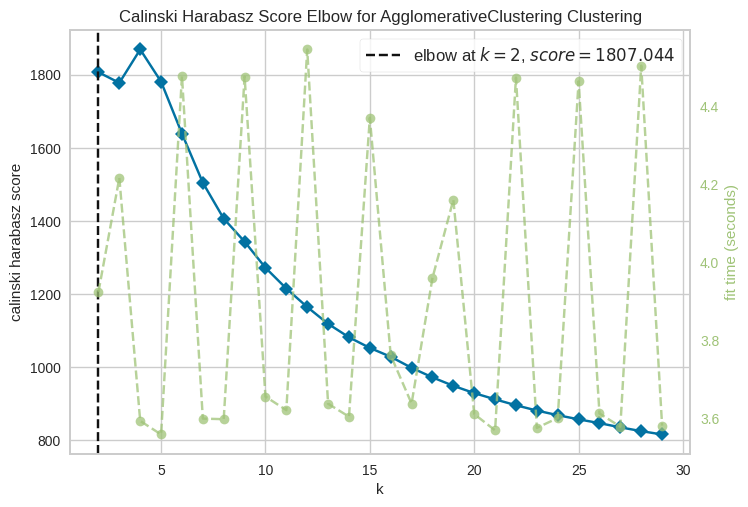

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors
clust_hier = AgglomerativeClustering()

visualizer = KElbowVisualizer(clust_hier, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show()

Pour le clustering hierarchique, la méthode du coude donne également 8 clusters, le coefficient Silhouette donne 2 clusters et le coefficient Calinski Harabasz donne aussi 2 clusters

#####Remarque

Pour chaque type de clustering, la méthode du coude donne 8 clusters (ce qui correspond au nombre de clusters par défault dans les differentes méthodes), et le coefficient silhouette et calinski harabasz donnent 2 clusters

On teste pour voir si en utilisant ces nombres de clusters on améliore le clustering

Pour Kmeans :

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


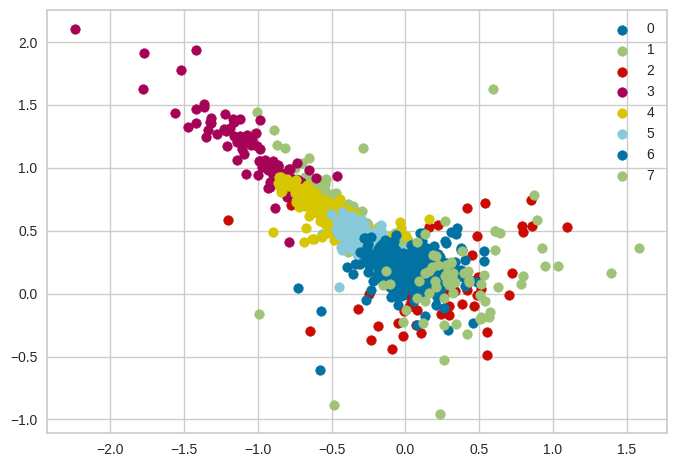

In [33]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans(n_clusters=8)
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [36]:
nmi

0.08062574881771849

In [37]:
ari

0.021478497753995084

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


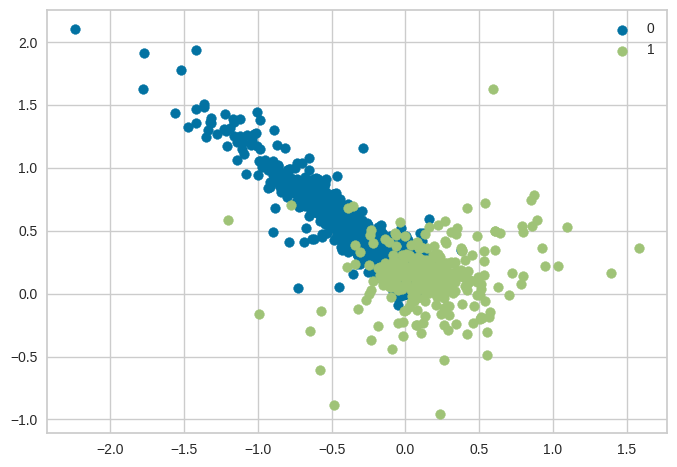

In [38]:
from sklearn.cluster import KMeans

X = model.wv.vectors

kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [39]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [40]:
nmi

0.051643702781404226

In [41]:
ari

0.02049039644809757

Pour Kmedoids :

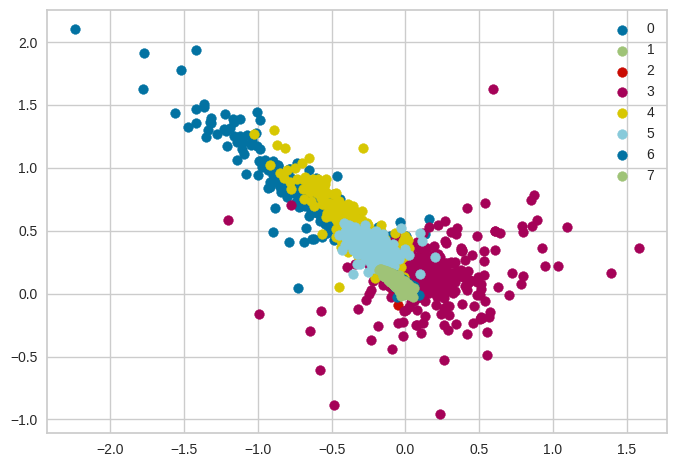

In [42]:
from sklearn_extra.cluster import KMedoids

X = model.wv.vectors

kmedoids = KMedoids(n_clusters=8)
label = kmedoids.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [43]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [44]:
nmi

0.13875867763798627

In [45]:
ari

0.0936744467480832

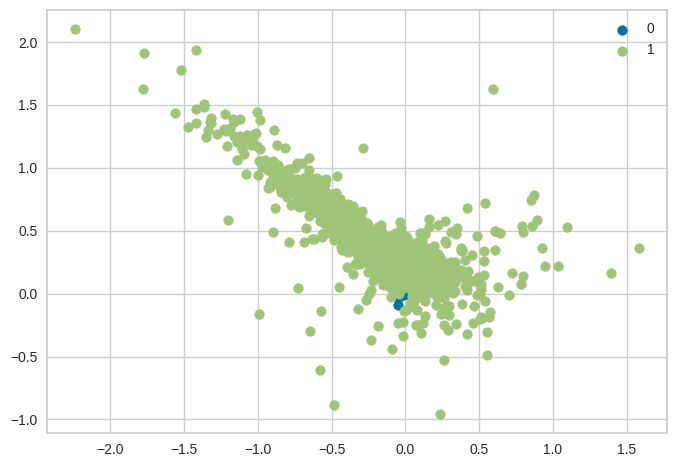

In [46]:
from sklearn_extra.cluster import KMedoids

X = model.wv.vectors

kmedoids = KMedoids(n_clusters=2)
label = kmedoids.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [47]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [48]:
nmi

0.0027362734594767054

In [49]:
ari

0.005046822666048811

Pour Spherical Kmeans :

 == New init == 
iteration: 0
5642.454224627714
iteration: 1
6084.708639363424
iteration: 2
6113.699709950111
iteration: 3
6121.640962946083
iteration: 4
6125.471406216611
iteration: 5
6128.227666273648
iteration: 6
6130.275089729602
iteration: 7
6131.375920427252
iteration: 8
6132.246099112537
iteration: 9
6132.979588805078
iteration: 10
6133.535802329803
iteration: 11
6133.961857889827
iteration: 12
6134.376234428475
iteration: 13
6134.870183780715
iteration: 14
6135.38620406846
iteration: 15
6135.818730479405
iteration: 16
6136.19744832143
iteration: 17
6136.475597547353
iteration: 18
6136.70226456048
iteration: 19
6136.900366325317


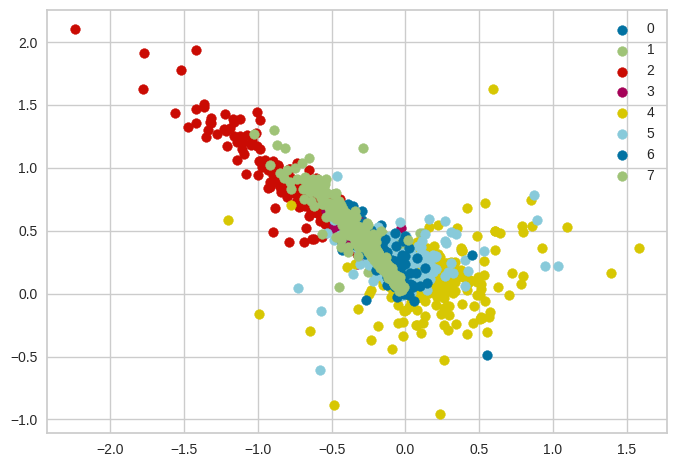

In [50]:
from coclust.clustering import SphericalKmeans

X = model.wv.vectors

skmeans = SphericalKmeans(n_clusters=8)
skmeans.fit(X)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [51]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [52]:
nmi

0.2517841005472187

In [53]:
ari

0.19791589685305563

 == New init == 
iteration: 0
5616.620370120342
iteration: 1
5780.389277591252
iteration: 2
5781.182373882625
iteration: 3
5781.400612826637
iteration: 4
5781.719296021354
iteration: 5
5782.145124260223
iteration: 6
5782.561979401553
iteration: 7
5783.076062414733
iteration: 8
5783.627055296301
iteration: 9
5784.348398375608
iteration: 10
5785.346320859877
iteration: 11
5786.798830135949
iteration: 12
5788.902591085831
iteration: 13
5792.320368263132
iteration: 14
5797.2985684919095
iteration: 15
5803.968681433376
iteration: 16
5810.964881736425
iteration: 17
5815.242088974783
iteration: 18
5817.252738173496
iteration: 19
5818.091482564018


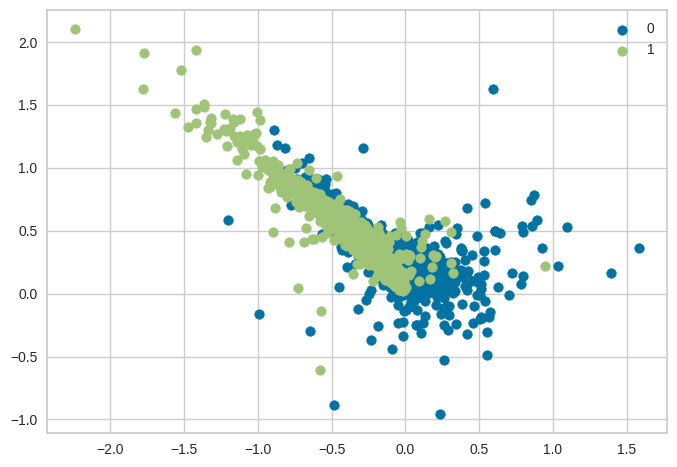

In [54]:
from coclust.clustering import SphericalKmeans

X = model.wv.vectors

skmeans = SphericalKmeans(n_clusters=2)
skmeans.fit(X)
label = skmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [55]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [56]:
nmi

0.18438369848198422

In [57]:
ari

0.2076045961206385

Pour le clustering hierarchique:

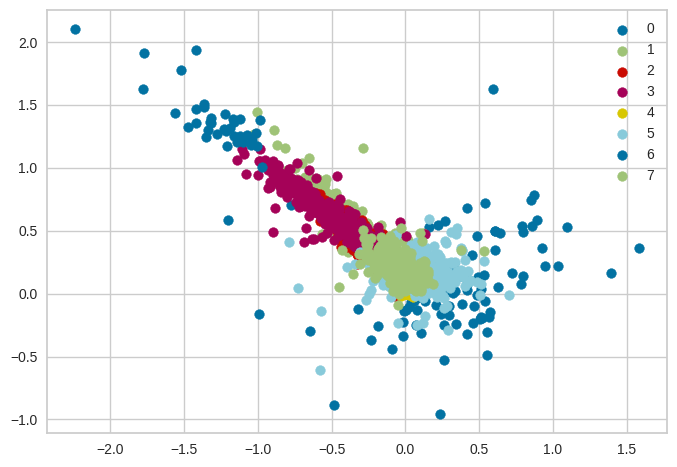

In [58]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=8, linkage='ward')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [59]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [60]:
nmi

0.09060430676812849

In [61]:
ari

0.035423085209628925

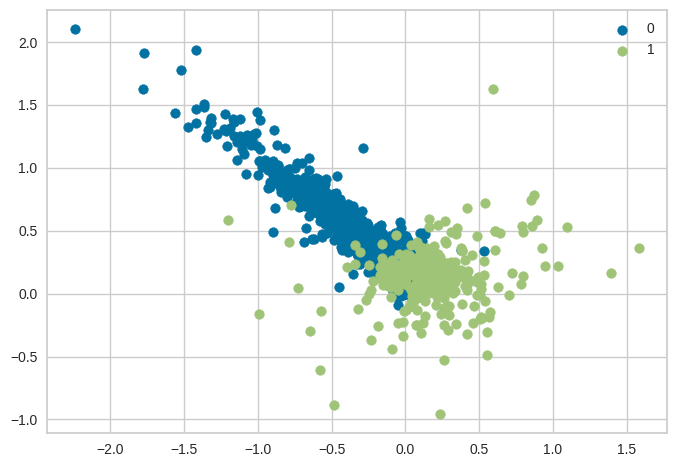

In [62]:
from sklearn.cluster import AgglomerativeClustering

X = model.wv.vectors

clust_hierarchique = AgglomerativeClustering(n_clusters=2, linkage='ward')
label = clust_hierarchique.fit_predict(X)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [63]:
nmi = normalized_mutual_info_score(vocab_labels2, label)
ari = adjusted_rand_score(vocab_labels2, label)

In [64]:
nmi

0.05377282969146993

In [65]:
ari

0.020178951833529298

On voit que en prenant 2 clusters on obtient des resultats similaires voire pire, alors qu'en prenant 8 clusters on obtient de meilleurs resultats pour chaque clustering sauf spherical kmeans. Cependant les résultats restent quand même mauvais

####Partie 1 : Conclusion 

On a les tableaux récapitulatifs suivants pour 3 clusters:

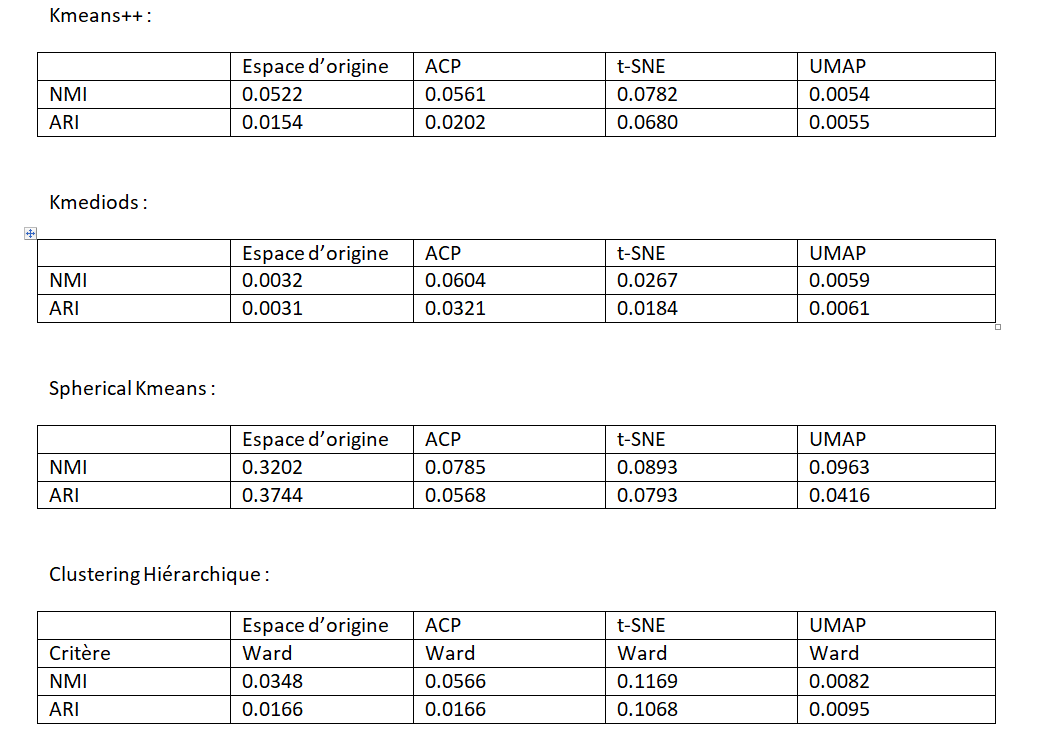

De manière générale les differents clusterings donnent de très mauvais resultats.

Pour Kmeans++ les differentes réduction de dimensions donnent des scores assez similaires (à part UMAP qui est largement pire).

Pour Kmediods, l'ACP donne le meilleur résultat.

Pour Spherical Kmeans l'espace d'origine donne un bien meilleur clustering que les clustering après une réduction de dimension.

Pour le clustering hiérarchique, la réduction de dimension t-SNE donne le meilleur résultat. Par ailleurs pour chaque type de reduction de dimension, le critère de Ward donne le meilleur clustering.  



On peut constater que dans la majorité des clusterings, l'espace d'origine donne de pire resultats. Donc il semble que la réduction de dimension ameliore le clustering. 

Il semble aussi que la réduction de dimension UMAP donne de pire resultats que les autres réduction de dimensions.

Quant à la meilleur technique de clustering, il semble que spherical Kmeans soit le plus performant

Si on prend comme nombre de clusters 8, on obtient de meilleurs resultats, cependant ces derniers reste quand même mauvais

###Partie 2: Approche jointe/simultanée


####Reduced Kmeans

Je n'ai pas trouvé d'implementation de reduced k-means en python

####Deep Kmeans

Pour Deep Kmeans je n'arrive pas à installer le package. On a l'erreur ci-dessous qui dit qu'il ne trouve pas de projet python car il manque les fichiers setup.py et pyproject.toml. En effet en regardant le github, on voit que ces fichiers n'existent pas. Par ailleurs il n'y a pas de documentation pour expliquer l'installation

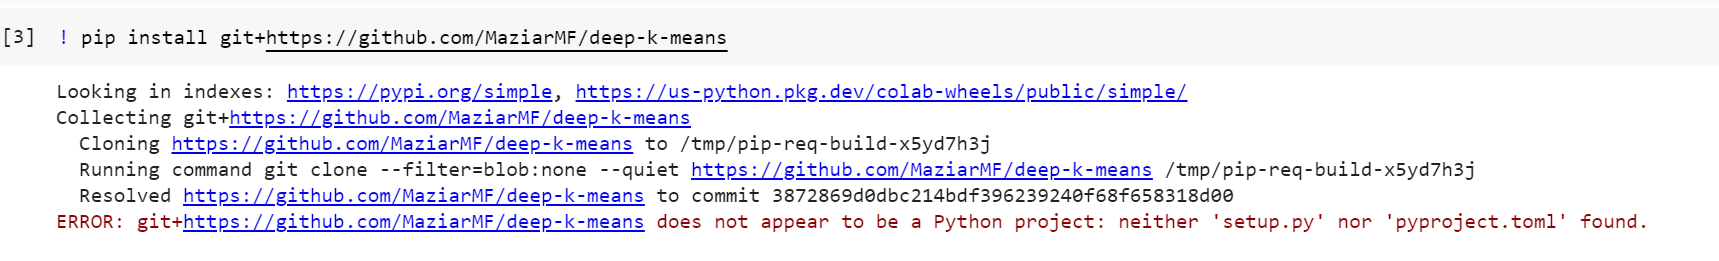

In [123]:
! pip install git+https://github.com/MaziarMF/deep-k-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/MaziarMF/deep-k-means to /tmp/pip-req-build-yv4f2452
  Running command git clone --filter=blob:none --quiet https://github.com/MaziarMF/deep-k-means /tmp/pip-req-build-yv4f2452
  Resolved https://github.com/MaziarMF/deep-k-means to commit 3872869d0dbc214bdf396239240f68f658318d00
ERROR: git+https://github.com/MaziarMF/deep-k-means does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
